In [417]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns    



In [418]:
data_frame_raw = pd.read_csv("daily_data.csv")

In [419]:
data_frame_raw.shape

(2893, 17)

In [420]:
data_frame_raw.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM
1,D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM
4,D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM


In [421]:
from datetime import datetime

# Function to convert AM/PM time to seconds since midnight
def convert_to_seconds(time_str):
    time_obj = datetime.strptime(time_str, '%I:%M %p')
    return (time_obj.hour * 3600 + time_obj.minute * 60)/3600


In [422]:
data_frame_raw["rise_time"] = data_frame_raw["sunrise"].apply(convert_to_seconds)
data_frame_raw["set_time"] = data_frame_raw["sunset"].apply(convert_to_seconds)
data_frame_raw["day_duration"] = data_frame_raw["set_time"] - data_frame_raw["rise_time"]   
data_frame_raw.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset,rise_time,set_time,day_duration
0,D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM,6.066667,19.316667,13.250000
1,D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM,6.083333,19.300000,13.216667
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM,6.083333,19.300000,13.216667
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM,6.100000,19.266667,13.166667
4,D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM,6.116667,19.250000,13.133333


In [423]:
# calculate the null values in the data
data_frame_raw.isnull().sum()


day_id                         0
city_id                        0
temperature_celsius            0
condition_text              2414
wind_kph                       0
wind_degree                    0
pressure_mb                    0
precip_mm                      0
humidity                       0
cloud                          0
feels_like_celsius             0
visibility_km                  0
uv_index                       0
gust_kph                       0
air_quality_us-epa-index       0
sunrise                        0
sunset                         0
rise_time                      0
set_time                       0
day_duration                   0
dtype: int64

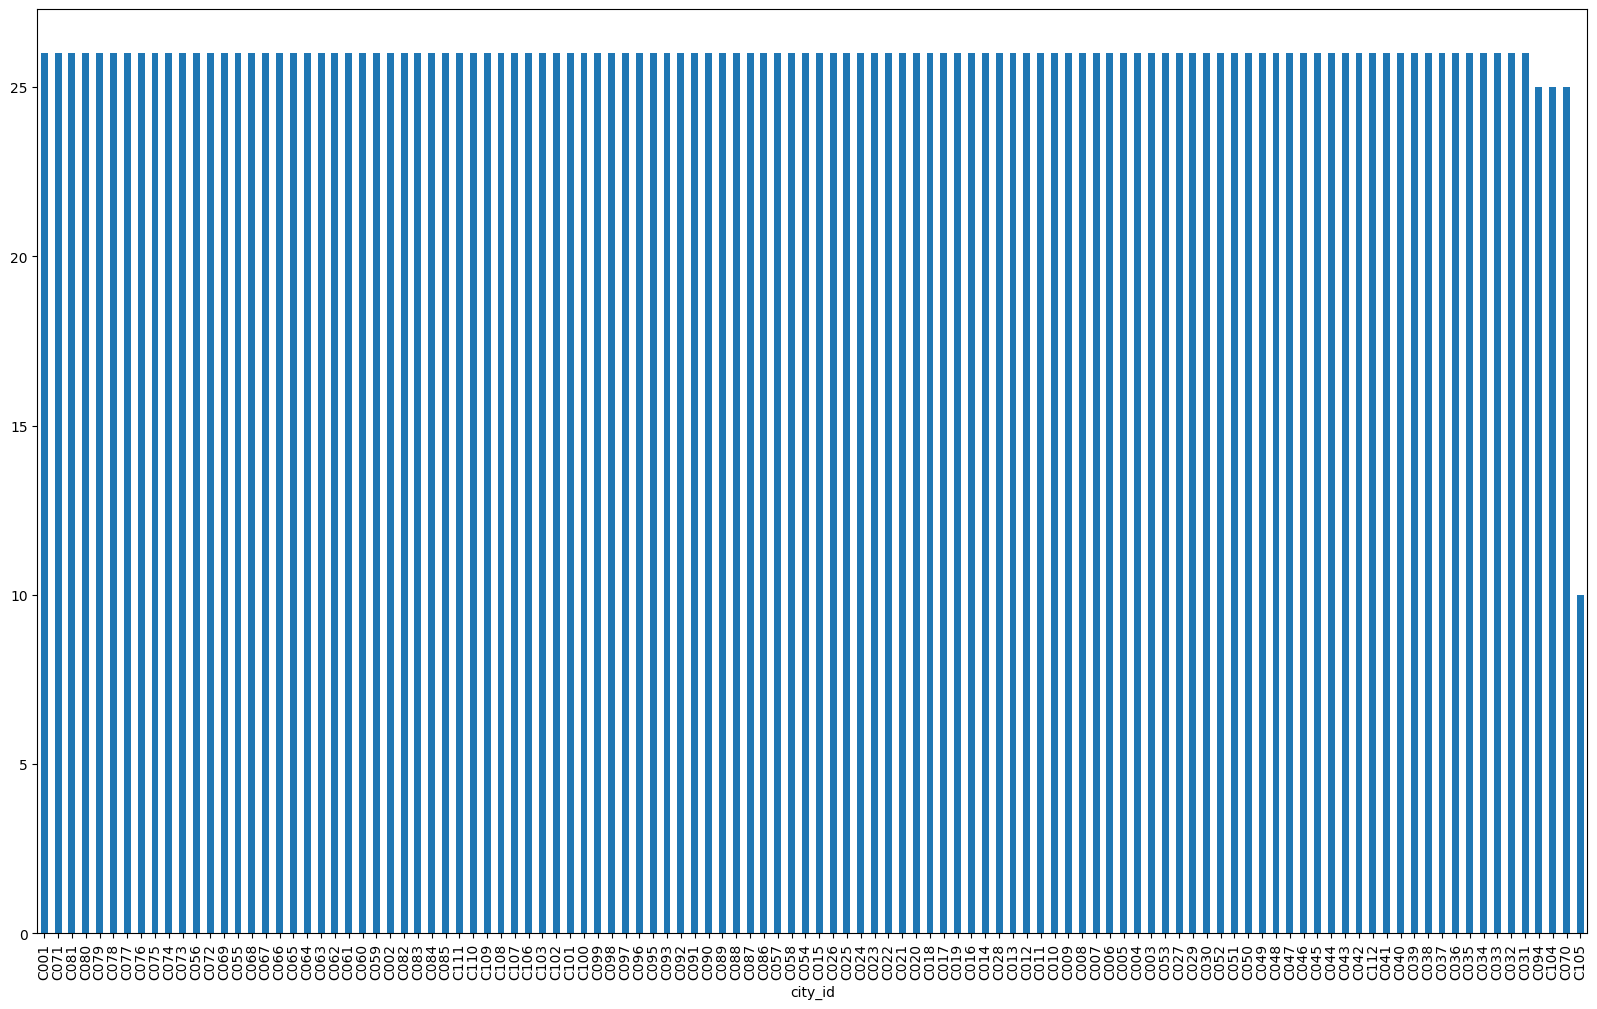

In [424]:
# citiywise distribution of the data using bar plot
plt.figure(figsize=(20,12))
data_frame_raw["city_id"].value_counts().plot(kind='bar')  
plt.show()

In [425]:
'''data_frame_raw.hist(bins=50, figsize=(20,15))
plt.show()'''

'data_frame_raw.hist(bins=50, figsize=(20,15))\nplt.show()'

In [426]:
'''pd.plotting.scatter_matrix(data_frame_raw, figsize=(20,20))
plt.show()'''

'pd.plotting.scatter_matrix(data_frame_raw, figsize=(20,20))\nplt.show()'

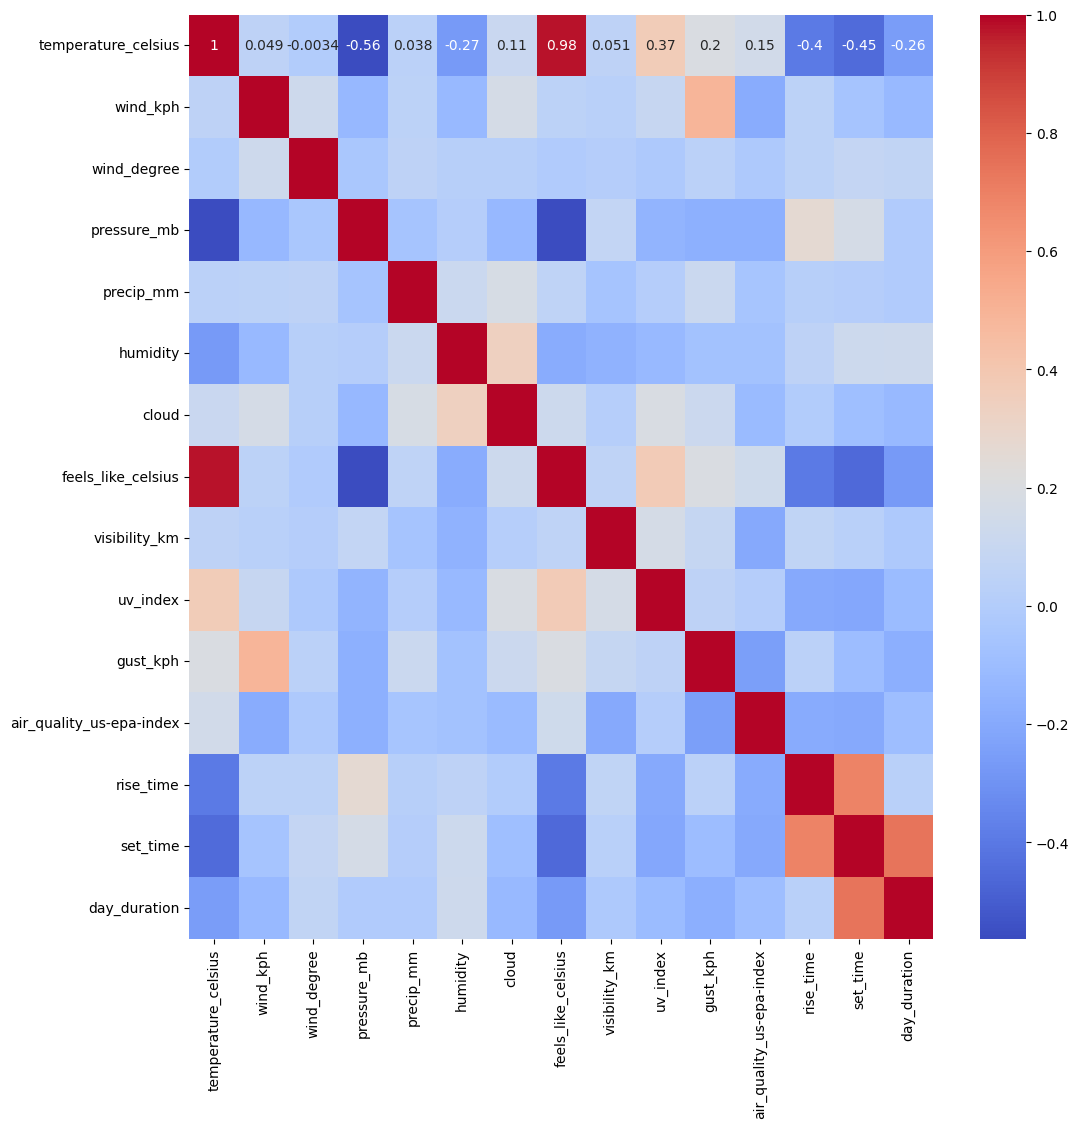

In [427]:
# plot the heatmap to show the correlation between the features
plt.figure(figsize=(12,12))
sns.heatmap( data_frame_raw.drop(columns=['day_id','city_id','condition_text','sunrise','sunset']).corr(), annot=True , cmap='coolwarm' )
plt.show()

In [428]:
# add onehot encoding to the data
data_frame_raw = pd.get_dummies(data_frame_raw, columns=['city_id'])
data_frame_raw.head()

,day_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,...,city_id_C103,city_id_C104,city_id_C105,city_id_C106,city_id_C107,city_id_C108,city_id_C109,city_id_C110,city_id_C111,city_id_C112
0,D0001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,...,False,False,False,False,False,False,False,False,False,False
1,D0002,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,...,False,False,False,False,False,False,False,False,False,False
2,D0003,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,...,False,False,False,False,False,False,False,False,False,False
3,D0004,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,...,False,False,False,False,False,False,False,False,False,False
4,D0005,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,...,False,False,False,False,False,False,False,False,False,False


In [429]:
# extract all the data that contains null values
unsupervised_data = data_frame_raw[ data_frame_raw.isnull().any(axis=1) ]
print(unsupervised_data.shape)
unsupervised_data.head()

(2414, 131)


,day_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,...,city_id_C103,city_id_C104,city_id_C105,city_id_C106,city_id_C107,city_id_C108,city_id_C109,city_id_C110,city_id_C111,city_id_C112
0,D0001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,...,False,False,False,False,False,False,False,False,False,False
1,D0002,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,...,False,False,False,False,False,False,False,False,False,False
4,D0005,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,...,False,False,False,False,False,False,False,False,False,False
5,D0006,20.0,NaN,3.6,96,1019.0,0.0,88,0,20.0,...,False,False,False,False,False,False,False,False,False,False
7,D0008,21.0,NaN,20.2,330,1011.0,0.0,53,75,21.0,...,False,False,False,False,False,False,False,False,False,False


In [430]:
# extract the data that does not contain null values
supervised_data = data_frame_raw.dropna()
print(supervised_data.shape)
supervised_data.head()

(479, 131)


,day_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,...,city_id_C103,city_id_C104,city_id_C105,city_id_C106,city_id_C107,city_id_C108,city_id_C109,city_id_C110,city_id_C111,city_id_C112
2,D0003,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,...,False,False,False,False,False,False,False,False,False,False
3,D0004,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,...,False,False,False,False,False,False,False,False,False,False
6,D0007,21.0,Partly Cloudy,4.0,310,1015.0,0.0,100,50,21.0,...,False,False,False,False,False,False,False,False,False,False
18,D0019,19.0,Clear and Sunny,3.6,64,1017.0,0.0,88,0,19.0,...,False,False,False,False,False,False,False,False,False,False
27,D0028,19.0,Partly Cloudy,3.6,83,1010.0,0.0,73,25,19.0,...,False,False,False,False,False,False,False,False,False,False


In [431]:
# get the diffrent categories of the data
categories =supervised_data['condition_text'].drop_duplicates().values
print(categories)

['Light Rain with Thunder' 'Clear and Sunny' 'Partly Cloudy'
 'Light Precipitation' 'Cloudy and Overcast' 'Mist or Fog' 'Rain Showers'
 'Moderate to Heavy Rain' 'Thunderstorms']


In [432]:
# add category id to the data
supervised_data['category_id'] = supervised_data['condition_text'].apply(lambda x: np.where(categories == x)[0][0])
supervised_data.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2620\1470854016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supervised_data['category_id'] = supervised_data['condition_text'].apply(lambda x: np.where(categories == x)[0][0])


,day_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,...,city_id_C104,city_id_C105,city_id_C106,city_id_C107,city_id_C108,city_id_C109,city_id_C110,city_id_C111,city_id_C112,category_id
2,D0003,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,...,False,False,False,False,False,False,False,False,False,0
3,D0004,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,...,False,False,False,False,False,False,False,False,False,1
6,D0007,21.0,Partly Cloudy,4.0,310,1015.0,0.0,100,50,21.0,...,False,False,False,False,False,False,False,False,False,2
18,D0019,19.0,Clear and Sunny,3.6,64,1017.0,0.0,88,0,19.0,...,False,False,False,False,False,False,False,False,False,1
27,D0028,19.0,Partly Cloudy,3.6,83,1010.0,0.0,73,25,19.0,...,False,False,False,False,False,False,False,False,False,2


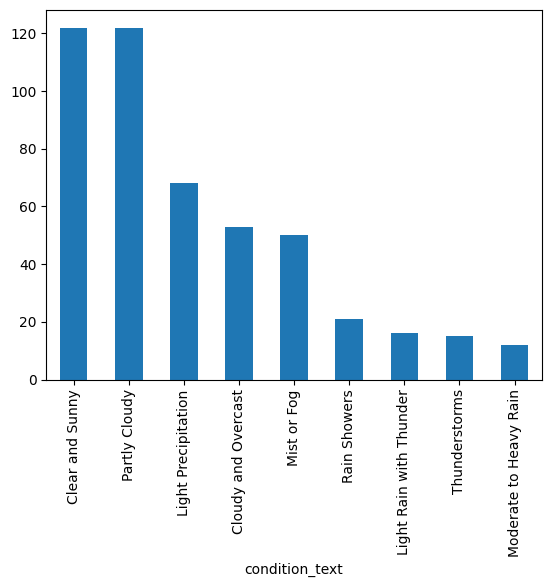

condition_text
Clear and Sunny            122
Partly Cloudy              122
Light Precipitation         68
Cloudy and Overcast         53
Mist or Fog                 50
Rain Showers                21
Light Rain with Thunder     16
Thunderstorms               15
Moderate to Heavy Rain      12
Name: count, dtype: int64
category_id
1    122
2    122
3     68
4     53
5     50
6     21
0     16
8     15
7     12
Name: count, dtype: int64


In [433]:
# plot different  clusters according to the condition_text and displya the count of each cluster
supervised_data['condition_text'].value_counts().plot(kind='bar')
plt.show()
print(supervised_data['condition_text'].value_counts())
print(supervised_data['category_id'].value_counts())

In [434]:
# ------------ Plotting --------------------------------------
# plot all the scattera by considering two features at a time
#sns.pairplot( supervised_data.drop(columns=['day_id','city_id','sunrise','sunset','feels_like_celsius']) , hue='condition_text')
#plt.show()

In [435]:
# add onehot encoding to the data
'''supervised_data = pd.get_dummies(supervised_data, columns=['city_id'])  
supervised_data.head()
'''

"supervised_data = pd.get_dummies(supervised_data, columns=['city_id'])  \nsupervised_data.head()\n"

In [436]:
# seperate the supervised data set into training and testing and validation set

training_data = supervised_data.sample(frac = 0.7 , random_state=42)
validation_data = supervised_data.drop(training_data.index)
testing_data = validation_data.sample(frac = 0.5, random_state=42)
validation_data = validation_data.drop(testing_data.index)

training_data.shape , validation_data.shape , testing_data.shape

((335, 132), (72, 132), (72, 132))

In [437]:
'''day_id                         0
city_id                        0
temperature_celsius            0
condition_text              2414
wind_kph                       0
wind_degree                    0
pressure_mb                    0
precip_mm                      0
humidity                       0
cloud                          0
feels_like_celsius             0
visibility_km                  0
uv_index                       0
gust_kph                       0
air_quality_us-epa-index       0
sunrise                        0
sunset                         0
rise_time                      0
set_time                       0
day_duration                   0
dtype: int64'''

'day_id                         0\ncity_id                        0\ntemperature_celsius            0\ncondition_text              2414\nwind_kph                       0\nwind_degree                    0\npressure_mb                    0\nprecip_mm                      0\nhumidity                       0\ncloud                          0\nfeels_like_celsius             0\nvisibility_km                  0\nuv_index                       0\ngust_kph                       0\nair_quality_us-epa-index       0\nsunrise                        0\nsunset                         0\nrise_time                      0\nset_time                       0\nday_duration                   0\ndtype: int64'

In [438]:
selected_features = ['condition_text','category_id' , 'pressure_mb' , 'humidity' , 'cloud' , 'gust_kph' , 'day_duration' , 'temperature_celsius' , 'wind_kph' , 'wind_degree' , 'precip_mm' , 'visibility_km' , 'uv_index' , 'air_quality_us-epa-index' , 'rise_time' , 'set_time']
dropping_features = ['day_id','sunrise','sunset','feels_like_celsius']
training_data_selected = training_data.drop(columns=dropping_features)    
validation_data_selected = validation_data.drop(columns=dropping_features)    
testing_data_selected = testing_data.drop(columns=dropping_features)

training_data_selected.shape , validation_data_selected.shape , testing_data_selected.shape

((335, 128), (72, 128), (72, 128))

In [439]:
'''# impliment the KNN algorithm and cluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(training_data_selected.drop(columns=['condition_text']), training_data_selected['condition_text'])
print(accuracy_score( training_data_selected['condition_text'], knn.predict(training_data_selected.drop( columns=['condition_text']))) )


validation_data_selected['predicted_condition'] = knn.predict(testing_data_selected.drop( columns=['condition_text']) )
print(accuracy_score(validation_data_selected['condition_text'], validation_data_selected['predicted_condition']))

# plot the scatter plot of the predicted data
plt.figure(figsize=(8,8))
sns.scatterplot(x='gust_kph', y='humidity', hue='predicted_condition', data=validation_data_selected)
plt.show()

'''

"# impliment the KNN algorithm and cluster\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import accuracy_score\n\nknn = KNeighborsClassifier(n_neighbors=5)\nknn.fit(training_data_selected.drop(columns=['condition_text']), training_data_selected['condition_text'])\nprint(accuracy_score( training_data_selected['condition_text'], knn.predict(training_data_selected.drop( columns=['condition_text']))) )\n\n\nvalidation_data_selected['predicted_condition'] = knn.predict(testing_data_selected.drop( columns=['condition_text']) )\nprint(accuracy_score(validation_data_selected['condition_text'], validation_data_selected['predicted_condition']))\n\n# plot the scatter plot of the predicted data\nplt.figure(figsize=(8,8))\nsns.scatterplot(x='gust_kph', y='humidity', hue='predicted_condition', data=validation_data_selected)\nplt.show()\n\n"

In [440]:
# PCA analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
training_data_selected_scaled = pd.DataFrame(scaler.fit_transform(training_data_selected.drop(columns=['condition_text' , 'category_id'])))

pca = PCA(n_components=10)
training_data_selected_pca = pca.fit_transform(training_data_selected_scaled)
training_data_selected_pca = pd.DataFrame(training_data_selected_pca)   

training_data_selected_pca['condition_text'] = training_data_selected['condition_text'].values
training_data_selected_pca['category_id'] = training_data_selected['category_id'].values

print('Selected Scaled :\n',training_data_selected_scaled.head(),'\n')
print('training_data_selected_pca :\n',training_data_selected_pca.head())

'''sns.pairplot(training_data_selected_pca , hue='category_id' , palette='Paired')
plt.show()'''

# validation of the model
validation_data_selected_scaled = pd.DataFrame(scaler.transform(validation_data_selected.drop(columns=['condition_text','category_id'])))
validation_data_selected_pca = pca.transform(validation_data_selected_scaled)
validation_data_selected_pca = pd.DataFrame(validation_data_selected_pca)

validation_data_selected_pca['condition_text'] = validation_data_selected['condition_text'].values
validation_data_selected_pca['category_id'] = validation_data_selected['category_id'].values


# testing the model
testing_data_selected_scaled = pd.DataFrame(scaler.transform(testing_data_selected.drop(columns=['condition_text','category_id'])))
testing_data_selected_pca = pca.transform(testing_data_selected_scaled)
testing_data_selected_pca = pd.DataFrame(testing_data_selected_pca)

testing_data_selected_pca['condition_text'] = testing_data_selected['condition_text'].values
testing_data_selected_pca['category_id'] = testing_data_selected['category_id'].values





Selected Scaled :
         0         1         2         3         4         5         6    \
0 -1.421330 -0.269823  1.574715 -1.002288 -0.193518  0.847679  1.529691   
1  1.343118  2.438272 -0.185999 -0.663130 -0.280341 -0.804564  0.132694   
2 -1.114169 -0.969522 -1.027229  0.863082  3.279431  0.847679  1.529691   
3  0.913093  0.015239  0.332433 -1.511025 -0.193518  0.208101  0.970892   
4  1.803859  0.015239  1.672532 -1.850184 -0.338224 -0.804564 -0.565805   

        7         8         9    ...       116      117       118        119  \
0  0.157314  0.366335 -0.746519  ... -0.077498 -0.10993 -0.054718  -0.095059   
1  0.157314  2.198010  0.868547  ... -0.077498 -0.10993 -0.054718  -0.095059   
2  0.157314 -0.549502 -0.549123  ... -0.077498 -0.10993 -0.054718  -0.095059   
3  0.157314 -0.549502 -0.037685  ... -0.077498 -0.10993 -0.054718  -0.095059   
4  0.157314 -0.549502  0.195602  ... -0.077498 -0.10993 -0.054718  10.519823   

       120       121       122       123  124    

In [441]:
# Kmeans clustering
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
kmeans = KMeans(n_clusters=9 , random_state=42,algorithm='auto',init='k-means++')

kmeans.fit( training_data_selected_pca.drop(columns=['condition_text','category_id']))

prediction = kmeans.predict( training_data_selected_pca.drop(columns=['condition_text','category_id']) )

# calculate accuracy of the model
print(accuracy_score(training_data_selected['category_id'], prediction))

print(accuracy_score(validation_data_selected['category_id'], kmeans.predict(validation_data_selected_pca.drop(columns=['condition_text','category_id']))))

print(accuracy_score(testing_data_selected['category_id'], kmeans.predict(testing_data_selected_pca.drop(columns=['condition_text','category_id']))))


0.15522388059701492
0.08333333333333333
0.1111111111111111


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [442]:
# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

agg = AgglomerativeClustering(n_clusters=9)
agg.fit(training_data_selected_pca.drop(columns=['condition_text','category_id']))

prediction = agg.labels_

print(accuracy_score(training_data_selected_pca['category_id'], prediction))

print(accuracy_score(validation_data_selected_pca['category_id'], agg.fit_predict(validation_data_selected_pca.drop(columns=['condition_text','category_id']))))

print(accuracy_score(testing_data_selected_pca['category_id'], agg.fit_predict(testing_data_selected_pca.drop(columns=['condition_text','category_id']))))

#print(prediction)
#training_data_selected_pca['category_id'].values


0.15223880597014924
0.1111111111111111
0.125


In [443]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(training_data_selected_scaled)

print(accuracy_score(training_data_selected['category_id'], dbscan.labels_))

print(accuracy_score(validation_data_selected['category_id'], dbscan.fit_predict(validation_data_selected_scaled)))

print(accuracy_score(testing_data_selected['category_id'], dbscan.fit_predict(testing_data_selected_scaled)))


0.0
0.0
0.0


In [444]:
#classification using Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, random_state=42)
rf.fit( training_data_selected_pca.drop(columns=['condition_text','category_id']), training_data_selected_pca['category_id'])

print(accuracy_score(training_data_selected_pca['category_id'], rf.predict(training_data_selected_pca.drop(columns=['condition_text','category_id']))))



print(accuracy_score(validation_data_selected_pca['category_id'], rf.predict(validation_data_selected_pca.drop(columns=['condition_text','category_id']))))

print(accuracy_score(testing_data_selected_pca['category_id'], rf.predict(testing_data_selected_pca.drop(columns=['condition_text','category_id']))))



1.0
0.5555555555555556
0.3888888888888889


In [445]:
# XGBoost classification
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=15, random_state=42)
xgb.fit(training_data_selected_pca.drop(columns=['condition_text','category_id']), training_data_selected_pca['category_id'])

print(accuracy_score(training_data_selected_pca['category_id'], xgb.predict(training_data_selected_pca.drop(columns=['condition_text','category_id']))))

print(accuracy_score(validation_data_selected_pca['category_id'], xgb.predict(validation_data_selected_pca.drop(columns=['condition_text','category_id']))))

print(accuracy_score(testing_data_selected_pca['category_id'], xgb.predict(testing_data_selected_pca.drop(columns=['condition_text','category_id']))))




1.0
0.5694444444444444
0.4305555555555556


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

In [446]:
# SVM classification
from sklearn.svm import SVC

svm = SVC(kernel='rbf',random_state=42 , C=0.9, gamma=0.08)
svm.fit(training_data_selected_pca.drop(columns=['condition_text','category_id']), training_data_selected_pca['category_id'])

print(accuracy_score(training_data_selected_pca['category_id'], svm.predict(training_data_selected_pca.drop(columns=['condition_text','category_id']))))

print(accuracy_score(validation_data_selected_pca['category_id'], svm.predict(validation_data_selected_pca.drop(columns=['condition_text','category_id']))))

print(accuracy_score(testing_data_selected_pca['category_id'], svm.predict(testing_data_selected_pca.drop(columns=['condition_text','category_id']))))




0.6955223880597015
0.625
0.4722222222222222


In [447]:
# softmax regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
logreg.fit(training_data_selected_pca.drop(columns=['condition_text','category_id']), training_data_selected_pca['category_id'])

print(accuracy_score(training_data_selected_pca['category_id'], logreg.predict(training_data_selected_pca.drop(columns=['condition_text','category_id']))))

print(accuracy_score(validation_data_selected_pca['category_id'], logreg.predict(validation_data_selected_pca.drop(columns=['condition_text','category_id']))))

print(accuracy_score(testing_data_selected_pca['category_id'], logreg.predict(testing_data_selected_pca.drop(columns=['condition_text','category_id']))))


0.608955223880597
0.625
0.4166666666666667


In [448]:
# Neural Network for classification
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(40,50), max_iter=500, random_state=42 , learning_rate='adaptive', solver='adam', activation='relu')
mlp.fit(training_data_selected_pca.drop(columns=['condition_text','category_id']), training_data_selected_pca['category_id'])

print(accuracy_score(training_data_selected_pca['category_id'], mlp.predict(training_data_selected_pca.drop(columns=['condition_text','category_id']))))

print(accuracy_score(validation_data_selected_pca['category_id'], mlp.predict(validation_data_selected_pca.drop(columns=['condition_text','category_id']))))

print(accuracy_score(testing_data_selected_pca['category_id'], mlp.predict(testing_data_selected_pca.drop(columns=['condition_text','category_id']))))

# 

0.9850746268656716
0.6527777777777778
0.5277777777777778


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [449]:
# make predictions for the unsupervised data using mlp
'''
# add onehot encoding to the data
unsupervised_data = pd.get_dummies(unsupervised_data, columns=['city_id'])

'''

"\n# add onehot encoding to the data\nunsupervised_data = pd.get_dummies(unsupervised_data, columns=['city_id'])\n\n"

In [450]:
unsupervised_data_selected = unsupervised_data.drop(columns=dropping_features + ['condition_text'])

In [451]:
dropping_features

['day_id', 'sunrise', 'sunset', 'feels_like_celsius']

In [452]:


unsupervised_data_selected_scaled = pd.DataFrame(scaler.transform(unsupervised_data_selected))
unsupervised_data_selected_pca = pca.transform(unsupervised_data_selected_scaled)

unsupervised_data_selected_pca = pd.DataFrame(unsupervised_data_selected_pca)
unsupervised_data_selected_pca['predicted_category'] =  mlp.predict(unsupervised_data_selected_pca)

unsupervised_data_selected_pca.head()


,0,1,2,3,4,5,6,7,8,9,predicted_category
0,0.238029,-0.587399,0.824626,1.813329,0.790934,-0.685696,0.107338,0.568692,1.015228,1.873476,3
1,-0.674373,-0.180908,1.099085,1.598754,0.448218,-0.823555,-0.748842,0.931355,-0.334934,1.617119,2
2,-1.748481,-1.230076,0.696384,0.377840,1.549382,-0.950388,-1.587325,0.725815,0.103049,1.360414,2
3,-1.505523,-1.157203,0.508049,0.431511,1.468829,-0.936223,-1.588497,0.834474,0.138369,1.376385,2
4,-0.671187,0.289521,0.415253,0.689519,-0.650820,-1.569863,-0.136220,0.732163,0.168946,1.727285,2


In [453]:
# remap the category id to the category text
unsupervised_data_selected_pca['condition_text'] = unsupervised_data_selected_pca['predicted_category'].apply(lambda x: categories[x])
unsupervised_data_selected_pca.head()


,0,1,2,3,4,5,6,7,8,9,predicted_category,condition_text
0,0.238029,-0.587399,0.824626,1.813329,0.790934,-0.685696,0.107338,0.568692,1.015228,1.873476,3,Light Precipitation
1,-0.674373,-0.180908,1.099085,1.598754,0.448218,-0.823555,-0.748842,0.931355,-0.334934,1.617119,2,Partly Cloudy
2,-1.748481,-1.230076,0.696384,0.377840,1.549382,-0.950388,-1.587325,0.725815,0.103049,1.360414,2,Partly Cloudy
3,-1.505523,-1.157203,0.508049,0.431511,1.468829,-0.936223,-1.588497,0.834474,0.138369,1.376385,2,Partly Cloudy
4,-0.671187,0.289521,0.415253,0.689519,-0.650820,-1.569863,-0.136220,0.732163,0.168946,1.727285,2,Partly Cloudy


In [456]:
# store the predicted values in the unsupervised data using its date id and predicted category
unsupervised_data_selected_pca['day_id'] = unsupervised_data['day_id'].values
unsupervised_data_selected_pca = unsupervised_data_selected_pca[['day_id','condition_text']]
print(unsupervised_data_selected_pca.head())

#unsupervised_data_selected_pca.to_csv('data_predicted.csv', index=False)

# store the supervised data data using its date id and predicted category
supervised_data_selected_pca = supervised_data[['day_id','condition_text']]
print(supervised_data_selected_pca.head())

#supervised_data_selected_pca.to_csv('data_predicted.csv', index=False)

results = pd.concat([supervised_data_selected_pca, unsupervised_data_selected_pca])
print(results.head())

results.to_csv('data_predicted.csv', index=False)




  day_id       condition_text
0  D0001  Light Precipitation
1  D0002        Partly Cloudy
2  D0005        Partly Cloudy
3  D0006        Partly Cloudy
4  D0008        Partly Cloudy
   day_id           condition_text
2   D0003  Light Rain with Thunder
3   D0004          Clear and Sunny
6   D0007            Partly Cloudy
18  D0019          Clear and Sunny
27  D0028            Partly Cloudy
   day_id           condition_text
2   D0003  Light Rain with Thunder
3   D0004          Clear and Sunny
6   D0007            Partly Cloudy
18  D0019          Clear and Sunny
27  D0028            Partly Cloudy


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2620\2058325938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unsupervised_data_selected_pca['day_id'] = unsupervised_data['day_id'].values
